In [1]:
from skimage import io, exposure
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

# Atividade: Filtros em Imagens

## Filtros passa-baixas

1. Vimos que para filtrar uma imagem, é necessário definir um *kernel*, que nada mais é que a resposta ao impulso do filtro. Considere a imagem [1]. Defina filtros passa-baixas (a) 3x3 e (b) 9x9. Você pode gerar manualmente a matriz (como no exemplo _Blur_ de [2]) ou usar um dos elementos estruturantes (*square*, *disk*, etc.) do módulo *morphology* do Skimage [3]. Filtre a imagem. A imagem é melhorada com esses filtros? Mostre os resultados.


R: reduz um pouco o ruído, mas a imagem fica muito borrada; Quando maior o kernel, mais borrado fica

In [2]:
img = io.imread('hw3_train.jpg')
plt.imshow(img, cmap='gray')

In [3]:
def apply_and_compare(img, f, figsize=(10,10), cmap='gray'):
    plt.subplots(nrows=1, ncols=2, figsize=figsize, sharex='row', sharey='row')        
    plt.subplot(1,2,1)
    plt.imshow(img, cmap=cmap)
    
    plt.subplot(1,2,2)
    img2 = f(img)
    plt.imshow(img2, cmap=cmap)

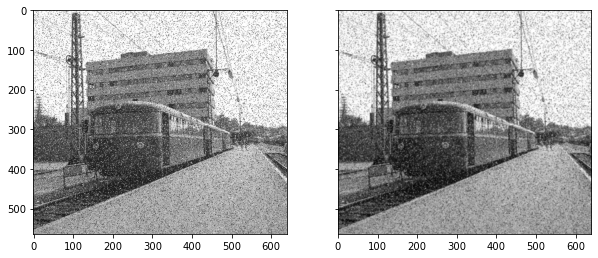

In [4]:
size = 3
kernel = np.ones((size, size))*1/size**2
apply_and_compare(img, lambda img: ndi.correlate(img, kernel))

In [5]:
size = 9
kernel = np.ones((size, size))*1/size**2
apply_and_compare(img, lambda img: ndi.correlate(img, kernel))

2. Filtre a mesma imagem [1] com filtro de mediana [4]. A imagem é melhorada? Qual a influência do tamanho do filtro e do formato do elemento estruturante? O filtro de mediana é linear? Mostre os resultados.

R: consegue eliminar o ruído sem borrar a imagem. 
Quanto maior o kernel, maiores ficam as regiões com a mesma cor.
O kernel quadrado preservou melhor os formatos dos objetos, mas acredito que esse efeito varie de imagem para imagem.

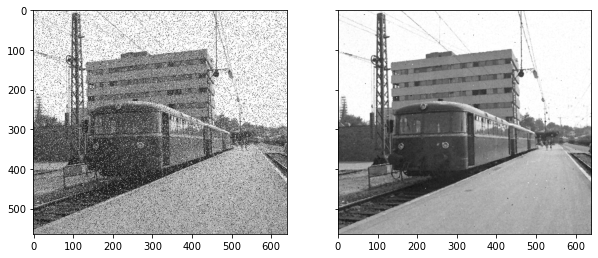

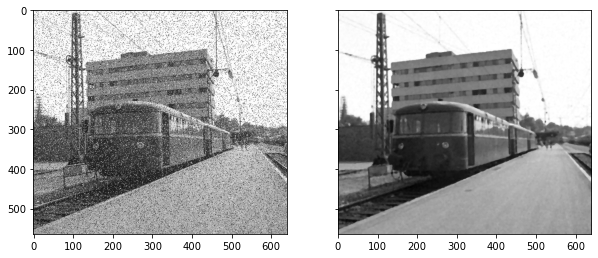

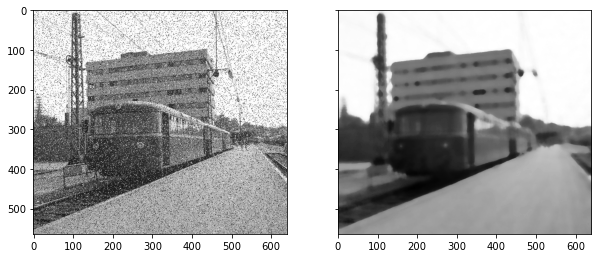

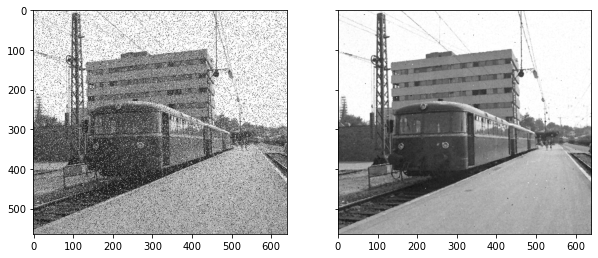

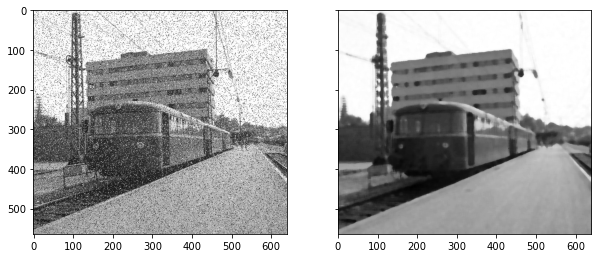

In [6]:
from skimage.filters.rank import median 
from skimage.morphology import disk, square

apply_and_compare(img, lambda img: median(img)) #3x3 square neighbourhood
apply_and_compare(img, lambda img: median(img, disk(3)))
apply_and_compare(img, lambda img: median(img, disk(9)))
apply_and_compare(img, lambda img: median(img, square(3)))
apply_and_compare(img, lambda img: median(img, square(9)))

## Filtros passa-altas

4. Considere a imagem [5]. Procure melhorá-la (aguçar os contornos) usando um filtro linear. Você pode usar um filtro passa-altas (como no exemplo _Sharpening_ de [2]) ou a máscara *unsharp_mask* de `skimage.filters` [6]. Apresente os resultados.

In [7]:
img = io.imread('hw3_road_sign_school_blurry.jpg')
plt.imshow(img, cmap='gray')

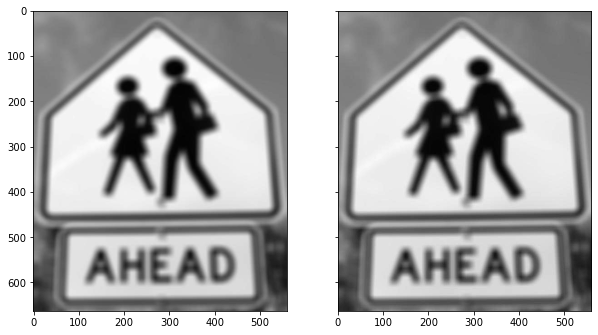

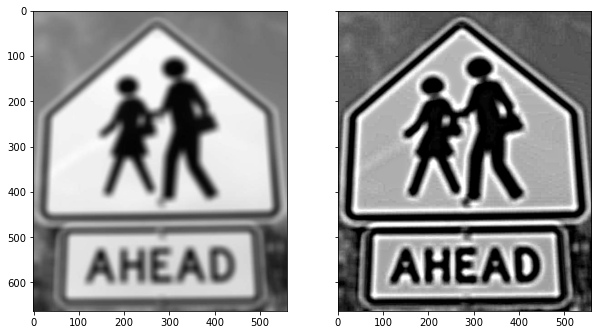

In [8]:
from skimage.filters import unsharp_mask
apply_and_compare(img, lambda img: unsharp_mask(img, radius=1, amount=1))
apply_and_compare(img, lambda img: unsharp_mask(img, radius=3, amount=3)) #parece ter o melhor resultado
apply_and_compare(img, lambda img: unsharp_mask(img, radius=3, amount=9))
apply_and_compare(img, lambda img: unsharp_mask(img, radius=6, amount=6))

## Detecção de bordas

5. Usando um kernel do tipo Sobel ou Canny, identifique as bordas da folha na imagem [7]. Mostre o resultado. Depois, aplique os mesmos parâmetros para a imagem [8]. As bordas são detectadas corretamente? É necessário ajustar os parâmetros?

R: sim, para cada imagem o parâmetro ideal era diferente

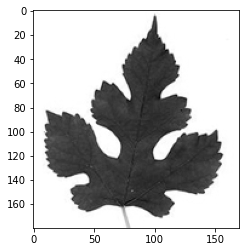

In [9]:
from skimage.color import rgb2gray

img = io.imread('hw3_leaf_training_1.jpg')
img = rgb2gray(img)
plt.imshow(img, cmap='gray')

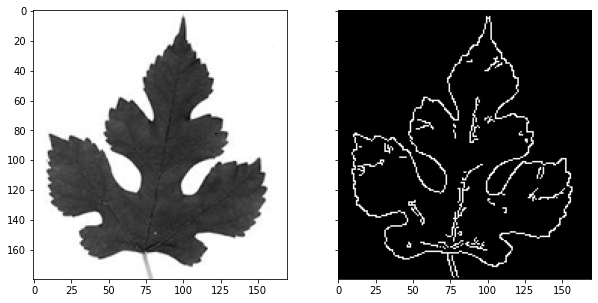

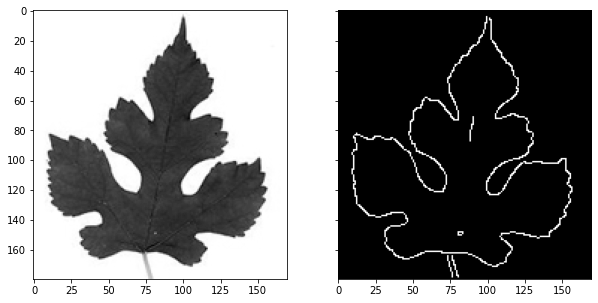

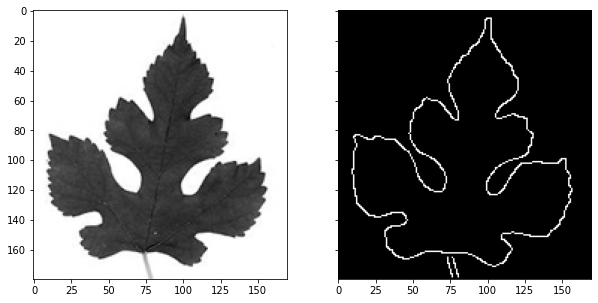

In [10]:
from skimage.feature import canny
apply_and_compare(img, lambda img: canny(img, 0.5))
apply_and_compare(img, lambda img: canny(img, 1))
apply_and_compare(img, lambda img: canny(img, 1.5))  #melhor resultado

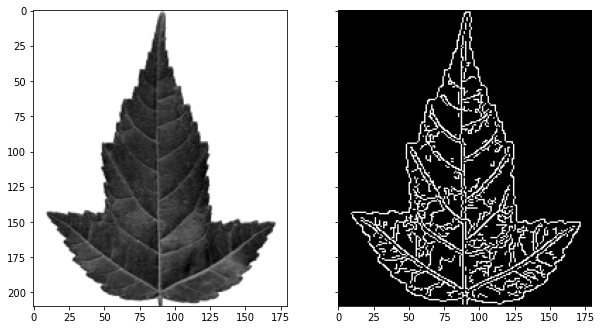

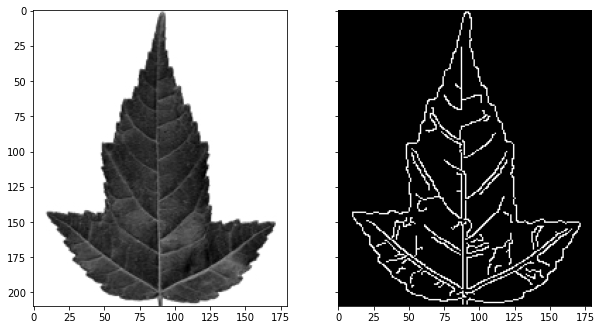

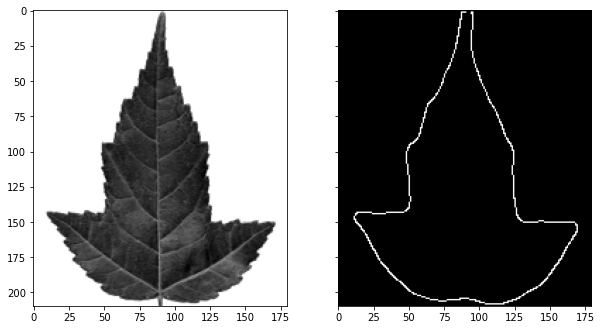

In [11]:
img = io.imread('hw3_leaf_training_4.jpg')
img = rgb2gray(img)
apply_and_compare(img, lambda img: canny(img, 0.5))
apply_and_compare(img, lambda img: canny(img, 1))
apply_and_compare(img, lambda img: canny(img, 2))
apply_and_compare(img, lambda img: canny(img, 4)) #melhor resultado

## Referências

[1] hw3_train.jpg foi obtido de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip (link não está mais disponível; arquivo está em anexo)

[2] https://www.codingame.com/playgrounds/2524/basic-image-manipulation/filtering

[3] https://scikit-image.org/docs/dev/api/skimage.morphology.html

[4] https://scikit-image.org/docs/dev/auto_examples/applications/plot_rank_filters.html#noise-removal

[5] hw3_road_sign_school_blurry.jpg, obtido de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip (link não está mais disponível)

[6] https://scikit-image.org/docs/dev/auto_examples/filters/plot_unsharp_mask.html

[7] hw3_leaf_training_1.jpg, obtido de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip (link não está mais disponível)

[8] hw3_leaf_training_4.jpg, obtido de http://web.stanford.edu/class/ee368/Handouts/Homeworks/HW3/hw3_data.zip (link não está mais disponível)

## Bibliografia

https://scikit-image.org/docs/dev/auto_examples/applications/plot_rank_filters.html#image-smoothing


https://www.mathworks.com/help/images/what-is-image-filtering-in-the-spatial-domain.html

https://www.mathworks.com/examples/image/mw/images-ex48835658-detect-edges-in-images

https://www.mathworks.com/examples/image/mw/images-ex80028725-trace-boundaries-of-objects-in-images

https://www.mathworks.com/help/images/ref/imfindcircles.html#examples

https://www.mathworks.com/examples/image/community/18507-missing-planes